In [10]:
import os
import glob
import grizli
import grizli.utils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.io import fits
from astropy.table import Table
from tqdm import tqdm
from scipy import constants
from matplotlib.colors import LogNorm

In [2]:
# Spectra tools
import pysynphot as S
import webbpsf

/Users/ross.1333/anaconda3/envs/grizli39/lib/python3.9/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /Users/ross.1333/pysyn_cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/Users/ross.1333/anaconda3/envs/grizli39/lib/python3.9/site-packages/pysynphot/refs.py:117: UserWarning: No graph or component tables found; functionality will be SEVERELY crippled. No files found for /Users/ross.1333/pysyn_cdbs/mtab/*_tmg.fits
  warnings.warn('No graph or component tables found; '
/Users/ross.1333/anaconda3/envs/grizli39/lib/python3.9/site-packages/pysynphot/refs.py:124: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /Users/ross.1333/pysyn_cdbs/mtab/*_tmt.fits
  warnings.warn('No thermal tables found, '
**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-065 DOESN'T MATCH THE CURRENT ONLINE VERSION PRDOPSSOC-067
Please consider updating pysiaf, e.g. pip install --upgrade pysiaf or co

In [3]:
#copying from https://github.com/keithbuckholz/summer-roman-project/blob/master/psf/notebooks/psf_exploration.ipynb to simulate star images

In [4]:
webbpsf.roman

<module 'webbpsf.roman' from '/Users/ross.1333/anaconda3/envs/grizli39/lib/python3.9/site-packages/webbpsf/roman.py'>

In [5]:
wfi = webbpsf.roman.WFI()
wfi.filter = "GRISM0"

In [46]:
#fiducial zero point set based on 2022 sim below
def mag2flux(mag,zp=26.5):
    f0 = 10**(0.4*zp)
    flux = f0*10**(-0.4*mag) #mag = 26.5 - 2.5*np.log10(sumflux)
    return flux

In [44]:
mag2flux(16)

15848.931924611174

In [47]:
def star_postage(mag,detx=2044,dety=2044,offx=0,offy=0,wavelength = 1.5e-6, fov_pixels=364, oversample=2):
    arcperpixel = 0.11
    wfi.options['source_offset_x'] = offx*arcperpixel
    wfi.options['source_offset_y'] = offy*arcperpixel
    wfi.detector_position = (detx, dety)
    psf = wfi.calc_psf(monochromatic=wavelength, fov_pixels=fov_pixels, oversample=oversample)
    flux = mag2flux(mag)
    return psf[0].data*flux

In [138]:
fov_pixels = 364
pad = fov_pixels + 1
full_image = np.zeros((4088+2*pad,4088+2*pad))
stars00 = Table.read('/Users/ross.1333/Documents/GitHub/star_fields/py/stars_radec00.ecsv')
sel_ondet = stars00['Xpos'] < 4088
sel_ondet &= stars00['Ypos'] < 4088
stars00 = stars00[sel_ondet]
Ntot= len(stars00)
print(Ntot)
N = 0
for i in range(0,len(stars00)):
    xpos = stars00[i]['Xpos']
    ypos = stars00[i]['Ypos']
    mag = stars00[i]['magnitude']
    if xpos < 4088 and ypos < 4088:
        xp = int(xpos)
        yp = int(ypos)
        xoff = 0#xpos-xp
        yoff = 0#ypos-yp
        sp = star_postage(mag,xpos,ypos,xoff,yoff,fov_pixels=fov_pixels)
        full_image[xp+pad-fov_pixels:xp+pad+fov_pixels,yp+pad-fov_pixels:yp+pad+fov_pixels] += sp
        N += 1
        if N//100 == N/100:
            print(N,Ntot)

409


Attempted to get aberrations at field point (1562, 3950) which is outside the range of the reference data; approximating to nearest interpolated point (1561.6033353832906, 3550.459564819674)
Attempted to get aberrations at field point (2507, 3988) which is outside the range of the reference data; approximating to nearest interpolated point (2506.564677493309, 3549.521405135276)
Attempted to get aberrations at field point (1837, 3710) which is outside the range of the reference data; approximating to nearest interpolated point (1836.8413366174543, 3550.1863079308837)
Attempted to get aberrations at field point (3438, 3668) which is outside the range of the reference data; approximating to nearest interpolated point (3437.881456234106, 3548.596791803193)
Attempted to get aberrations at field point (186, 3993) which is outside the range of the reference data; approximating to nearest interpolated point (185.5620011930124, 3551.825701661759)
Attempted to get aberrations at field point (406

100 409


Attempted to get aberrations at field point (539, 3751) which is outside the range of the reference data; approximating to nearest interpolated point (538.8019111484812, 3551.4750043076215)
Attempted to get aberrations at field point (592, 3951) which is outside the range of the reference data; approximating to nearest interpolated point (591.6032986676345, 3551.422582974765)
Attempted to get aberrations at field point (4071, 3473) which is outside the range of the reference data; approximating to nearest interpolated point (4039.0371549435504, 3472.9841689722357)
Attempted to get aberrations at field point (819, 3770) which is outside the range of the reference data; approximating to nearest interpolated point (818.7827719421172, 3551.197038697501)
Attempted to get aberrations at field point (4074, 336) which is outside the range of the reference data; approximating to nearest interpolated point (4040.5908947733296, 335.98345264723787)
Attempted to get aberrations at field point (2072

200 409


Attempted to get aberrations at field point (69, 3951) which is outside the range of the reference data; approximating to nearest interpolated point (68.60381416530683, 3551.941818005296)
Attempted to get aberrations at field point (1934, 3609) which is outside the range of the reference data; approximating to nearest interpolated point (1933.9415139306655, 3550.0899066627644)
Attempted to get aberrations at field point (682, 4035) which is outside the range of the reference data; approximating to nearest interpolated point (681.5198146573952, 3551.3333136612982)
Attempted to get aberrations at field point (1838, 3648) which is outside the range of the reference data; approximating to nearest interpolated point (1837.9028893065465, 3550.1852540190553)
Attempted to get aberrations at field point (2486, 3785) which is outside the range of the reference data; approximating to nearest interpolated point (2485.7662368368055, 3549.542053872587)
Attempted to get aberrations at field point (38

300 409


Attempted to get aberrations at field point (3754, 4073) which is outside the range of the reference data; approximating to nearest interpolated point (3753.479060278791, 3548.28346581258)
Attempted to get aberrations at field point (542, 3588) which is outside the range of the reference data; approximating to nearest interpolated point (541.963734788029, 3551.471865242206)
Attempted to get aberrations at field point (449, 3739) which is outside the range of the reference data; approximating to nearest interpolated point (448.81391347191686, 3551.5643445882633)
Attempted to get aberrations at field point (5, 3748) which is outside the range of the reference data; approximating to nearest input grid point
Attempted to get aberrations at field point (408, 3737) which is outside the range of the reference data; approximating to nearest interpolated point (407.8159394861915, 3551.6050474663825)
Attempted to get aberrations at field point (3387, 4045) which is outside the range of the refer

400 409


Attempted to get aberrations at field point (4048, 3610) which is outside the range of the reference data; approximating to nearest input grid point
Attempted to get aberrations at field point (2067, 3590) which is outside the range of the reference data; approximating to nearest interpolated point (2066.9602460614296, 3549.95784537497)
Attempted to get aberrations at field point (3413, 3933) which is outside the range of the reference data; approximating to nearest interpolated point (3412.618388556001, 3548.6218730319624)


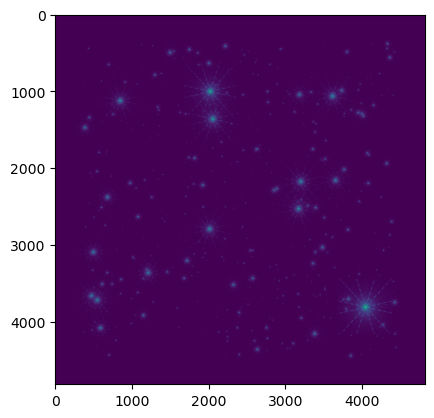

In [67]:
plt.imshow(np.log10(full_image+.01))

In [70]:
roman_base_dir = os.getenv('HOME')+'/Dropbox/RomanGRS/products/'
star_image_dir = os.getenv('HOME')+'/Dropbox/RomanGRS/star_images/'
ready_fits = roman_base_dir+"FOV0/roll_0/dither_0x_0y/SCA1/ready_direct_GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final.fits"
direct_fits_out = star_image_dir + 'ra0dec0_SCA1.fits'
empty_seg = star_image_dir +"empty_seg.fits"
empty_direct = star_image_dir +"empty_direct.fits"

In [142]:
file = fits.open(ready_fits)
#file[1].data = file[1].data
file[1].data = np.rot90(file[1].data, k=3) # np.rot90 rotates clockwise k times

file[0].header["INSTRUME"] = "ROMAN"
file[0].header["FILTER"] = "d1_"
file[1].header["CONFFILE"] = roman_base_dir+"configuration/Roman.det1.07242020.conf" # This had to be a path, not just a filename; otherwise, grizli can't find the sensitivity fits

file.writeto(ready_fits, overwrite=True)

file[1].data = np.zeros((4088,4088))
file.writeto(empty_direct, overwrite=True)

file[1].data = full_image[pad:-pad,pad:-pad]
print(file[1].data.shape)
file.writeto(direct_fits_out, overwrite=True)

header = file[1].header # We need to copy this header info into the segmentation file

file.close()

(4088, 4088)


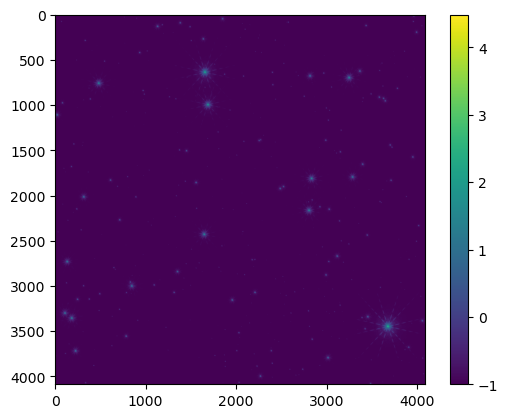

In [78]:
test = fits.open(direct_fits_out)
plt.imshow(np.log10(test[1].data+0.1))
plt.colorbar()

In [161]:
#construct a segmentation map from the direct image
#copied from example here https://photutils.readthedocs.io/en/stable/segmentation.html#image-segmentation
from photutils.background import Background2D, MedianBackground
full_image_fromfile = fits.open(direct_fits_out)[1].data
threshold = 0.01
from photutils.segmentation import detect_sources
segment_map = detect_sources(full_image_fromfile, threshold, npixels=10)

In [171]:
from photutils.segmentation import deblend_sources
segm_deblend = deblend_sources(full_image_fromfile, segment_map,
                               npixels=10, nlevels=32, contrast=0.001,
                               progress_bar=False)

5218


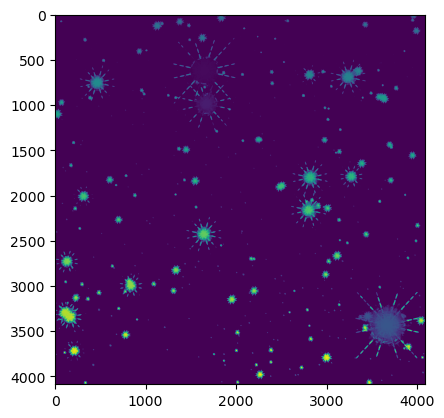

In [172]:
print(len(segm_deblend.labels))
plt.imshow(segm_deblend.data)

In [87]:
len(stars00),len(np.unique(stars00['index']))#.dtype.names

(409, 409)

In [109]:
len(np.unique(segment_map.data))

769

In [173]:
segmap_db_val = segm_deblend.data
missed_ids = []
found_ids = []
found_segids = []
found_mags = []
nt = 0
for row in stars00:
    ind = row["index"]
    x_0 = row["Xpos"] 
    y_0 = row["Ypos"] 
    segid = segmap_db_val[int(x_0)][int(y_0)]
    #segid = segmap_db_val[int(y_0)][int(x_0)]
    if segid != 0 and ~np.isin(segid,found_segids):
        found_ids.append(ind)
        found_segids.append(segid)
        found_mags.append(row["magnitude"])
    nt += 1

In [174]:
len(found_ids)

403

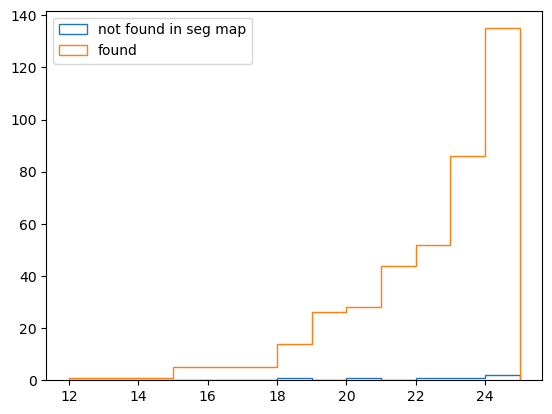

In [175]:
sel_found = np.isin(stars00['index'],found_ids)
plt.hist(stars00[~sel_found]["magnitude"],label='not found in seg map',bins=13,range=(12,25),histtype='step')
plt.hist(stars00[sel_found]["magnitude"],bins=13,range=(12,25),histtype='step',label='found')
plt.legend()
plt.show()

In [176]:
from grizli.model import GrismFLT
roman = GrismFLT(grism_file=roman_base_dir+'roman_empty.fits',direct_file=ready_fits, seg_file=None, pad=pad)

In [177]:
masked_seg = np.copy(segmap_db_val)
mask = np.isin(masked_seg,found_segids)
masked_seg[~mask] = 0

In [178]:
len(np.unique(masked_seg))

404

In [179]:
padded_seg = np.pad(masked_seg, [pad, pad], mode='constant')
roman.seg = padded_seg.astype("float32")

In [181]:
SED_dir = roman_base_dir+"FOV0/SEDs/" # Change to your path to directory containing SEDs

# Create F158 Filter Bandpass object
df = Table.read(os.path.join(SED_dir, "wfirst_wfi_f158_001_syn.fits"), format='fits') #close to H-band
bp = S.ArrayBandpass(df["WAVELENGTH"], df["THROUGHPUT"])


In [189]:
count = 0
minlam = 1e4
maxlam=2e4
github_dir='/Users/ross.1333/Documents/GitHub/'
tempdir = github_dir+'star_fields/data/SEDtemplates/'
templates = open(github_dir+'star_fields/data/SEDtemplates/input_spectral_STARS.lis').readlines()
temp_inds = stars00['star_template_index'] - 58*(stars00['star_template_index']//58)
for (segid,photid) in zip(found_segids,found_ids):
    sel_row = stars00['index'] == photid
    row = stars00[sel_row]
    mag = row["magnitude"][0]
    temp_ind = int(temp_inds[sel_row][0])#int(row['star_template_index'][0])
    #print(temp_ind)
    star_type = templates[temp_ind].strip('\n')
    temp = np.loadtxt(tempdir+star_type).transpose()
    wave = temp[0]
    sel = wave > minlam
    sel &= wave < maxlam
    wave = wave[sel]
    flux = temp[1]
    flux = flux[sel]
    star_spec = S.ArraySpectrum(wave=wave, flux=flux, waveunits="angstroms", fluxunits="flam")
    spec = star_spec.renorm(mag, "abmag", bp)
    spec.convert("flam")


    # By default, grizli trys to compute a cutout size. This cutout size is not large enough for the roman grism.
    # In 4) FOV0_sims/notebooks/dy-by-optimize.ipynb, I estimate the maximum needed size to be 77 for detector 1.
    # See that notebook for more details
    roman.compute_model_orders(id=segid, mag=mag, compute_size=False, size=77, in_place=True, store=False,
                               is_cgs=True, spectrum_1d=[spec.wave, spec.flux])
    count += 1
    if count%100 == 0:
        print('done with '+str(count)+' of '+str(len(found_segids)))

done with 100 of 403
done with 200 of 403
done with 300 of 403
done with 400 of 403


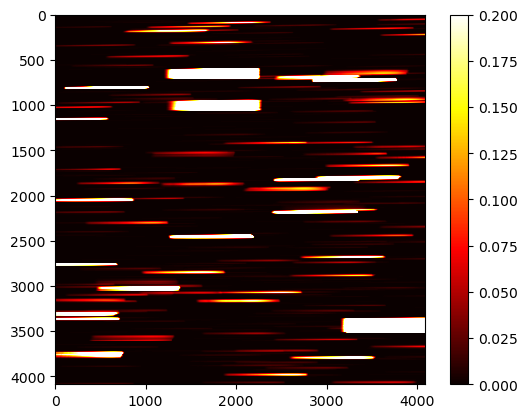

In [193]:
plt.imshow(roman.model[pad:-pad, pad:-pad], vmax=0.2, cmap="hot")
plt.colorbar()

In [ ]:
#segx = []
m,n = segmap_db_val.shape
R,C = np.mgrid[:m,:n]
segxyz = np.column_stack((C.ravel(),R.ravel(), segmap_db_val.ravel())).transpose()

In [147]:
full_image_nopad = full_image[pad:-pad,pad:-pad]

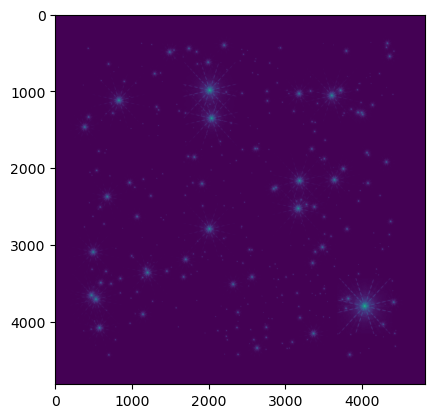

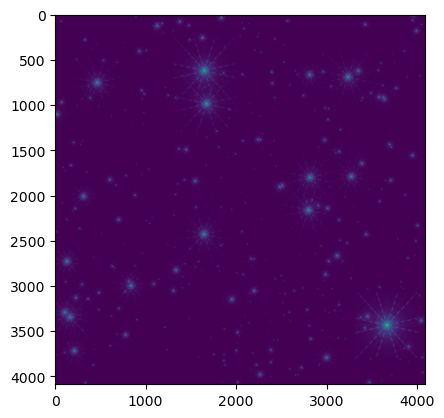

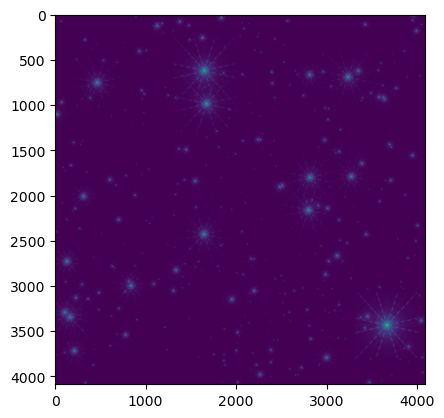

In [148]:
plt.imshow(np.log(full_image+0.01))
plt.show()
plt.imshow(np.log(full_image_nopad+0.01))
plt.show()
test = fits.open(direct_fits_out)
plt.imshow(np.log(test[1].data+0.01))
plt.show()

In [149]:
np.array_equal(full_image_nopad,test[1].data)

True

In [150]:
#m,n = full_image.shape
#R,C = np.mgrid[:m,:n]

full_image_xyz = np.column_stack((C.ravel(),R.ravel(), full_image_nopad.ravel())).transpose()

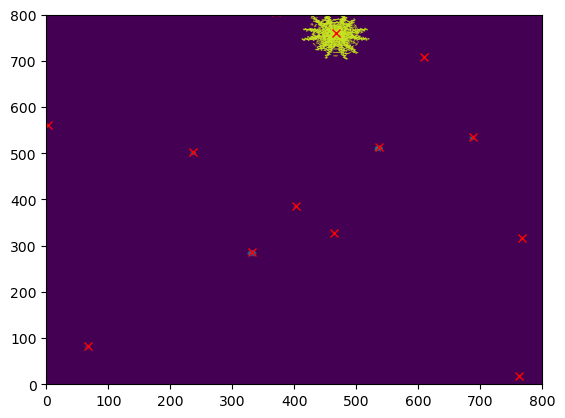

In [156]:
xmin = 0
xmax = 800
ymin = 0
ymax = 800
sel =  segxyz[0] >= xmin
sel &= segxyz[0] < xmax
sel &= segxyz[1] < ymax
sel &= segxyz[1] >= ymin
plt.scatter(segxyz[0][sel],segxyz[1][sel],c=segxyz[2][sel],s=.1)
#plt.scatter(full_image_xyz[0][sel]+.5,full_image_xyz[1][sel]+.5,c=np.log(full_image_xyz[2][sel]+0.01),s=.1)
plt.plot(stars00['Ypos'],stars00['Xpos'],'rx')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.show()

In [107]:
sel = stars00['Xpos'] < 100
sel &= stars00['Ypos'] < 100
stars00[sel]

index,Xpos,Ypos,8,8again,0,star_template_index,0again,magnitude,0again2,1,0again3,0again4,mag_again,RA,DEC
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
774.0,82.25625288137611,67.03272411942329,8.0,8.0,0.0,129.0,0.0,22.0,0.0,1.0,0.0,0.0,22.0,0.2625365459155007,-0.2629989434881002


In [ ]:
len(found_ids),nt#,found_mags

(51, 409)

In [ ]:
from photutils.segmentation import deblend_sources
segm_deblend = deblend_sources(full_image, segment_map,
                               npixels=10, nlevels=32, contrast=0.001,
                               progress_bar=False)

KeyboardInterrupt: 

In [ ]:
print(len(segm_deblend.labels))

Attempted to get aberrations at field point (4, 4) which is outside the range of the reference data; approximating to nearest interpolated point (10.87865237655274, 4.001703480033825)


0.99724161801499


15281.71437433279

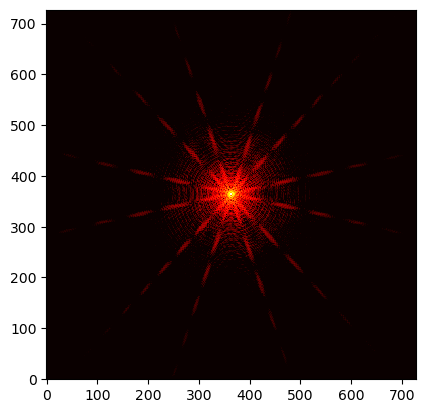

In [ ]:
# Maybe functional amplitdue functions?
f158_lam_center = 1.577 * 10**-6 # micrometer
telarea = 2.36**2 * constants.pi # meter ** 2

f_0 = 3.7059108273831045e-10 # this is just a number that seems to work; theoretically, this is comparable to an ABZeropoint

# Calculate number of counts as a function of magnitude
N = lambda mag: telarea * (f158_lam_center / (constants.h * constants.speed_of_light)) * f_0 * 10**(-0.4 * mag)

N(13.5)
# Exploring Magnitude adjustments and Spectral Source File
#src = webbpsf.specFromSpectralType('G0V', catalog='phoenix')
src = {'wavelengths': [1.5e-6], 'weights': [1.]}

wavelength = 1.5e-6
wfi.detector_position = (4, 4)
psf_0_0 = wfi.calc_psf(monochromatic=wavelength, fov_pixels=364, oversample=2)#.calc_psf(normalize='last', fov_pixels=364, oversample=2, source=src)
print(psf_0_0[0].data.sum())
factor = N(13.5)

vmin = 1e-7 * factor
vmax = 0.1 * factor
psf_0_0[0].data *= factor
plt.imshow(psf_0_0[0].data, interpolation='nearest', origin='lower', norm=LogNorm(vmin=vmin, vmax=vmax), cmap='hot')
psf_0_0[0].data.max()

Below shows quick derivation of assumed zero point in 2022 sims

159962.12024901807 13.489957120149331


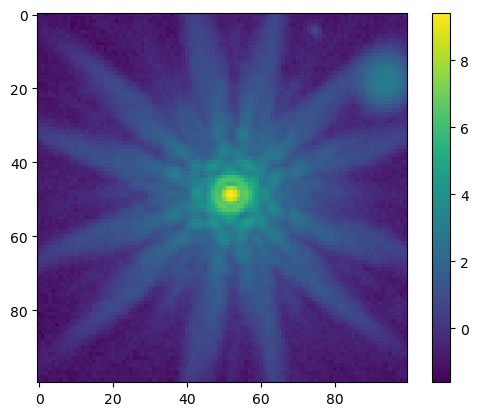

16077.794636428356 15.984433807332582


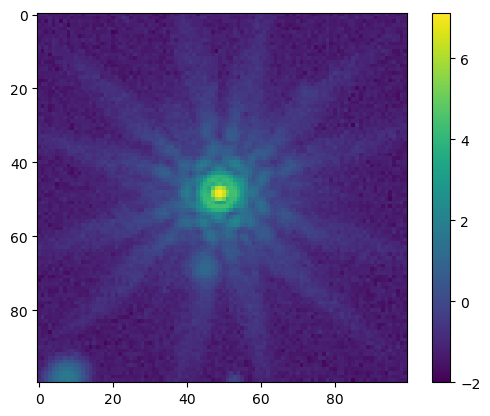

In [45]:
img = fits.open(direct_fits)[1].data
#this section contains a mag 13.5 star
plt.imshow(np.log(img)[1374:1474,1900:2000])#[1900:2000,1374:1474])
sumflux = np.sum(img[1374:1474,1900:2000]-0.25)
mag = 26.5 - 2.5*np.log10(sumflux)
print(sumflux,mag)
plt.colorbar()
plt.show()
#this section contains a mag 16 star
plt.imshow(np.log(img)[3094:3194,1966:2066])#[1900:2000,1374:1474])
sumflux = np.sum(img[3094:3194,1966:2066]-0.25)
mag = 26.5 - 2.5*np.log10(sumflux)
print(sumflux,mag)
plt.colorbar()
plt.show()

In [23]:
hlss_tbl = Table.read(roman_base_dir+"FOV0/roll_0/dither_0x_0y/SCA1/MOT_SCA1_roll_0_dither_0x_0y_cut_zcut.txt", format="ascii")

In [24]:
hlss_tbl.dtype.names

('NUMBER',
 'X_IMAGE',
 'Y_IMAGE',
 'A_IMAGE',
 'B_IMAGE',
 'THETA_IMAGE',
 'MAG_F1500W',
 'SPECTEMP',
 'Z',
 'MODIMAGE',
 'MODIMAGE_1',
 'MODIMAGE_2')

In [29]:
sel = (hlss_tbl['MODIMAGE'] == 1)

In [30]:
hlss_tbl[sel]

NUMBER,X_IMAGE,Y_IMAGE,A_IMAGE,B_IMAGE,THETA_IMAGE,MAG_F1500W,SPECTEMP,Z,MODIMAGE,MODIMAGE_1,MODIMAGE_2
int64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64
197387,1952.9096,1423.7904,8.0,8.0,0.0,13.5,197363,0.0,1,-1000.0,-1000.0
197396,3991.0112,1839.7266,8.0,8.0,0.0,14.0,197363,0.0,1,-1000.0,-1000.0
197413,2760.5404,559.0223,8.0,8.0,0.0,14.5,197363,0.0,1,-1000.0,-1000.0
197418,3117.5778,3807.8616,8.0,8.0,0.0,14.5,197363,0.0,1,-1000.0,-1000.0
197462,3014.4301,2698.0761,8.0,8.0,0.0,15.5,197363,0.0,1,-1000.0,-1000.0
197468,1807.191,18.6448,8.0,8.0,0.0,15.5,197363,0.0,1,-1000.0,-1000.0
197484,1847.8976,3386.2229,8.0,8.0,0.0,15.5,197363,0.0,1,-1000.0,-1000.0
197503,2015.8299,3143.3517,8.0,8.0,0.0,16.0,197363,0.0,1,-1000.0,-1000.0
197585,3950.5703,1521.7792,8.0,8.0,0.0,16.5,197363,0.0,1,-1000.0,-1000.0
